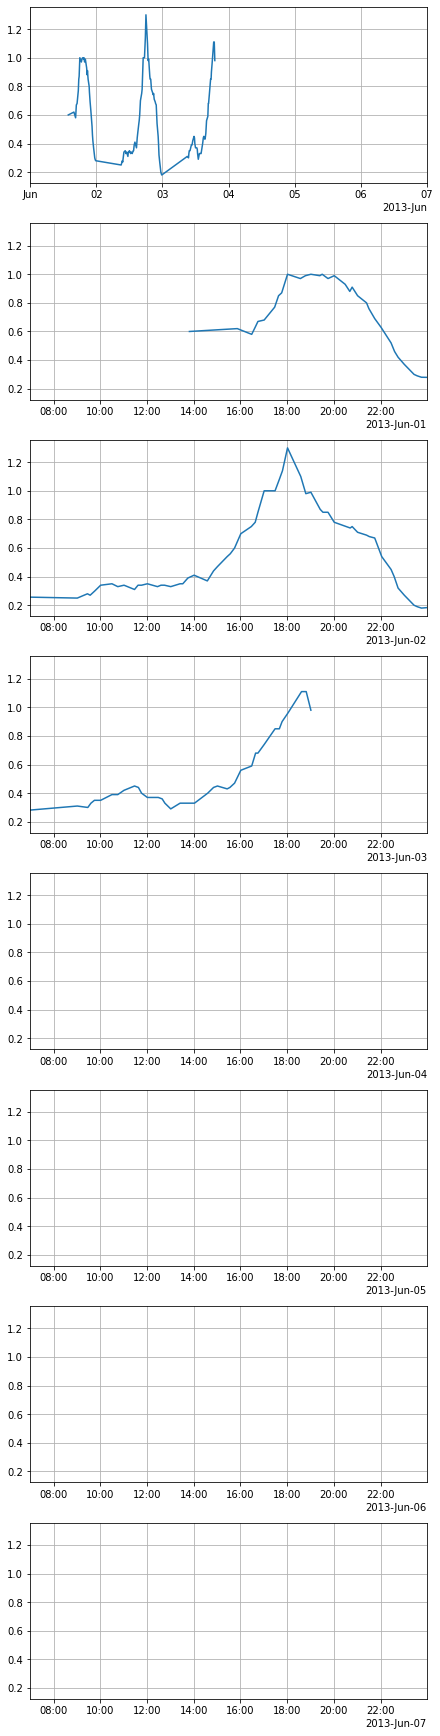

In [64]:
import matplotlib.pyplot as plt
import csv
from dateutil import parser
import matplotlib.dates as mdates
import numpy as np
import datetime

x = []
y = []

lims = [(np.datetime64('2013-06-01'), np.datetime64('2013-06-07')),
        (np.datetime64('2013-06-01 07:00'), np.datetime64('2013-06-01 23:59')),
        (np.datetime64('2013-06-02 07:00'), np.datetime64('2013-06-02 23:59')),
        (np.datetime64('2013-06-03 07:00'), np.datetime64('2013-06-03 23:59')),
        (np.datetime64('2013-06-04 07:00'), np.datetime64('2013-06-04 23:59')),
        (np.datetime64('2013-06-05 07:00'), np.datetime64('2013-06-05 23:59')),
        (np.datetime64('2013-06-06 07:00'), np.datetime64('2013-06-06 23:59')),
        (np.datetime64('2013-06-07 07:00'), np.datetime64('2013-06-07 23:59')),
]

with open('stats/total.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    next(plots)
    for row in plots:
        date = parser.parse(row[0])
        x.append(parser.parse("2013-06-%d %d:%d:00" % (date.weekday()+1,date.hour, date.minute)))
        y.append(float(row[1]) + float(row[2])/100)

fig, axs = plt.subplots(len(lims), 1, constrained_layout=True, figsize=(6, 24), )
for nn, ax in enumerate(axs):
    locator = mdates.AutoDateLocator(minticks=3, maxticks=12)
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

    ax.set_xlim(lims[nn])
    ax.grid(True)
    ax.plot(x, y)

plt.show()